In [1]:
from pyspark.sql import SQLContext
from pyspark.sql import DataFrame
from pyspark.sql import Row
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
hc = sc._jsc.hadoopConfiguration()
hc.set("hive.execution.engine", "mr")

## Load Carriers data

In [2]:
carriers = sqlContext.read.parquet("s3a://dlab6th-dmytro-liaskovskyi-bucket/processed3/carriers").cache()   
sqlContext.registerDataFrameAsTable(carriers, "carriers")
carriers.printSchema()
carriers.limit(20).toPandas()

root
 |-- code: string (nullable = true)
 |-- description: string (nullable = true)



,code,description
0,KW,Carnival Air Lines Inc.
1,KWQ,Kelowna Flightcraft Air Cha
2,KWZ,Crown Air
3,KX,Cayman Airways Limited
4,KXZ,Chaparral Airlines Inc.
5,KZ,Nippon Cargo Airlines
6,L2,Lynden Air Cargo Airlines
7,L4,Lynx Aviation d/b/a Frontier Airlines
8,LA,Lan-Chile Airlines
9,LAA,La Skycab Airline


## Load Airports data

In [3]:
airports = sqlContext.read.parquet("s3a://dlab6th-dmytro-liaskovskyi-bucket/processed3/airports").cache()
sqlContext.registerDataFrameAsTable(airports, "airports")
airports.printSchema()
airports.limit(20).toPandas()

root
 |-- airport: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- iata: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- longt: double (nullable = true)
 |-- state: string (nullable = true)



,airport,city,country,iata,lat,longt,state
0,Bobby L. Chain Municipal,Hattiesburg,USA,HBG,31.265066,-89.253033,MS
1,Hobart Municipal,Hobart,USA,HBR,34.991307,-99.051352,OK
2,Jim Hogg County,Hebbronville,USA,HBV,27.349556,-98.736972,TX
3,Heber Springs Municipal,Heber Springs,USA,HBZ,35.511694,-92.013009,AR
4,Hutchinson Municipal,Hutchinson,USA,HCD,44.858907,-94.381789,MN
5,Hallock Municipal,Hallock,USA,HCO,48.752731,-96.943003,MN
6,Hammond Municipal,Hammond,USA,HDC,30.520969,-90.417621,LA
7,Brewster,Holdredge,USA,HDE,40.452694,-99.337333,NE
8,Dillingham Airfield,Mokuleia,USA,HDH,21.579474,-158.197281,HI
9,Hardwick,Cleveland,USA,HDI,35.220073,-84.832443,TN


## Load Flights data

In [4]:
flights = sqlContext.read.parquet("s3a://dlab6th-dmytro-liaskovskyi-bucket/processed3/flights")
flights.printSchema()
sqlContext.registerDataFrameAsTable(flights, "flights")
flights.limit(10).toPandas()[["ArrDelay","CarrierDelay","CarrierDelayStr","WeatherDelay","WeatherDelayStr","Distance"]]

root
 |-- ActualElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: long (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CarrierDelay: long (nullable = true)
 |-- CarrierDelayStr: string (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DepDelay: long (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: long (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- LateAircraftDelay: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- NASDelay: long (nullable = true)
 |-- Origin: string (nullable = true)
 |-- SecurityDelay: long (nullable = true)
 |-- TailN

,ArrDelay,CarrierDelay,CarrierDelayStr,WeatherDelay,WeatherDelayStr,Distance
0,85,85,85,0,0,237
1,87,69,69,0,0,237
2,-4,0,NA,0,NA,237
3,46,0,0,0,0,237
4,21,21,21,0,0,237
5,-5,0,NA,0,NA,237
6,-5,0,NA,0,NA,237
7,28,0,0,6,6,237
8,7,0,NA,0,NA,237
9,32,0,0,0,0,237


## Taxonomy for ArrDelay, CarrierDelay, and Distance colums

In [5]:
flights.describe("ArrDelay","CarrierDelay","Distance").toPandas()

,summary,ArrDelay,CarrierDelay,Distance
0,count,7009728,7009728,7009728
1,mean,7.9881812817844,3.430691889899294,726.3870294253928
2,stddev,38.093619389401155,19.801347363550647,562.1018034840298
3,min,-519,0,11
4,max,2461,2436,4962


## Let's find the top 10 of the most unpunctual airlines

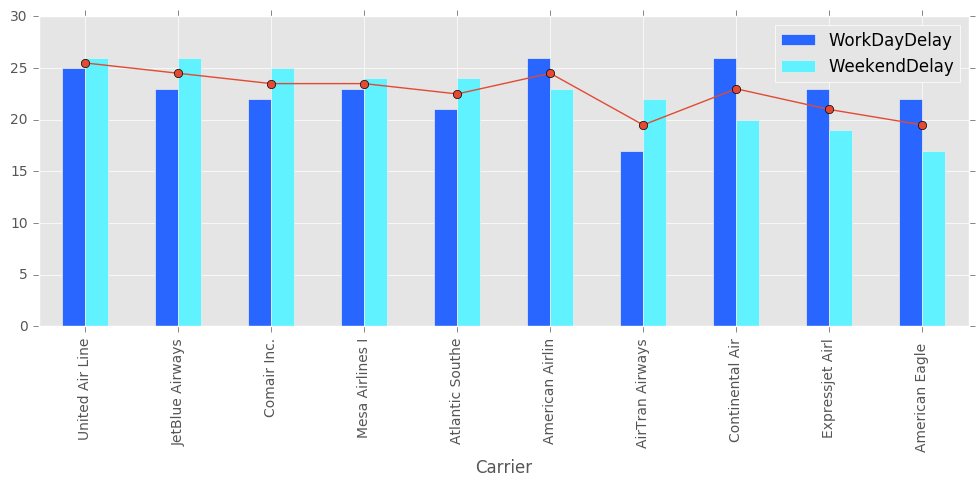

In [6]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


delay = sqlContext.sql("select SUBSTR(c.description, 0, 15) as Carrier, WorkDayDelay, WeekendDelay from \
   (select ceil( avg(f.ArrDelay + f.DepDelay) ) as WorkDayDelay, \
   f.UniqueCarrier \
   FROM flights f \
         WHERE f.DayOfWeek < 6 \
         GROUP BY f.UniqueCarrier ORDER BY WorkDayDelay desc limit 10) t \
JOIN \
  (select ceil( avg(f.ArrDelay + f.DepDelay) ) as WeekendDelay, \
   f.UniqueCarrier \
   FROM flights f \
         WHERE f.DayOfWeek > 5 \
         GROUP BY f.UniqueCarrier) t1 \
ON t.UniqueCarrier = t1.UniqueCarrier \
JOIN carriers c on t.UniqueCarrier = c.code order by WeekendDelay desc, WorkDayDelay desc \
").toPandas()

color_range_days = ["#2966FF", "#61F2FF"]
delay["Average"] = (delay.WorkDayDelay + delay.WeekendDelay) / 2
ax = delay.Average.plot(x='Carrier', linestyle='-', marker='o')
delay.plot(x='Carrier', y=['WorkDayDelay','WeekendDelay'], kind='bar', legend = True,  figsize=(12, 4), color=color_range_days, ax=ax);

## Number of flight performed by top companies

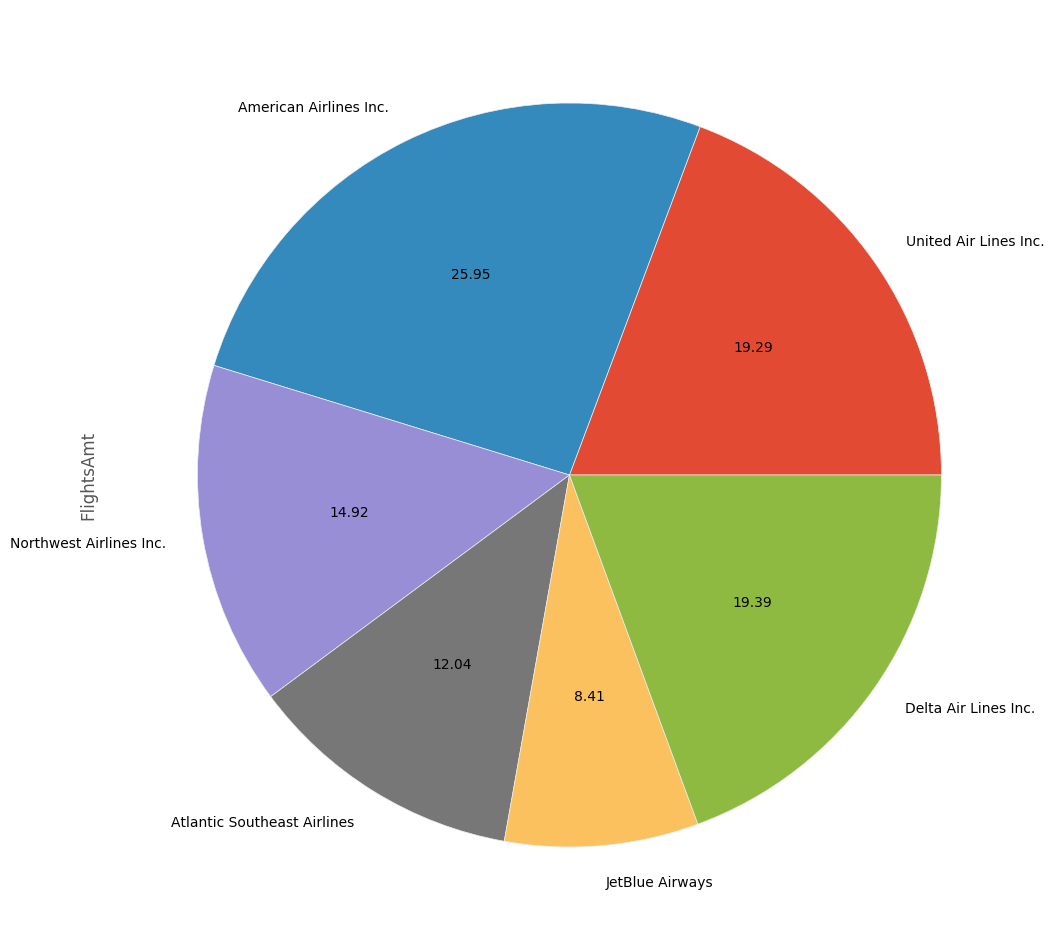

In [7]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

q = """SELECT t.cnt as FlightsAmt, carriers.description as Carrier FROM (
            SELECT count(*) as cnt, flights.UniqueCarrier as carrier_code 
                FROM flights GROUP BY flights.UniqueCarrier LIMIT 6) t 
            LEFT JOIN carriers ON t.carrier_code = carriers.code"""

topFlights = sqlContext.sql(q).toPandas()
topFlights.plot.pie(labels=topFlights["Carrier"], autopct='%.2f', legend=False, y="FlightsAmt", figsize=(12,12));

## The average Flight Distance per Company

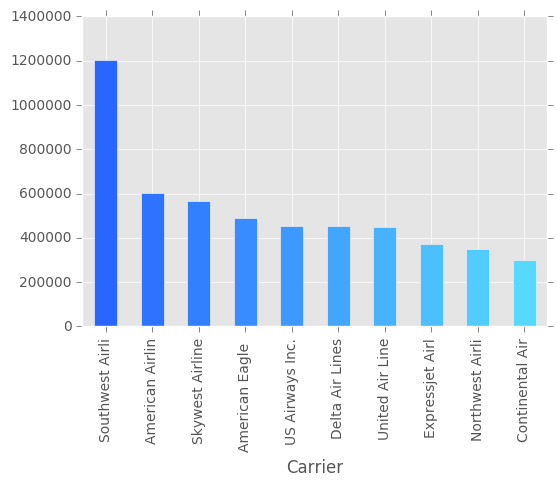

In [8]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

resultDistance = sqlContext.sql("SELECT SUBSTR(c.description, 0, 15) as Carrier, COUNT(Distance) AS Distance FROM flights f JOIN carriers c ON f.UniqueCarrier = c.code GROUP BY c.description ORDER BY distance DESC LIMIT 10").toPandas()

color_range =  ["#2966FF",
 	  "#2E73FF",
 	  "#3380FF",
 	  "#388CFF",
 	  "#3D99FF",
 	  "#42A6FF",
 	  "#47B2FF",
 	  "#4CBFFF",
 	  "#52CCFF",
 	  "#57D9FF",
 	  "#5CE6FF",
 	  "#61F2FF",
      "#66FFFF"]

resultDistance.plot(x='Carrier',  y='Distance', kind='bar', color=color_range, legend = False);